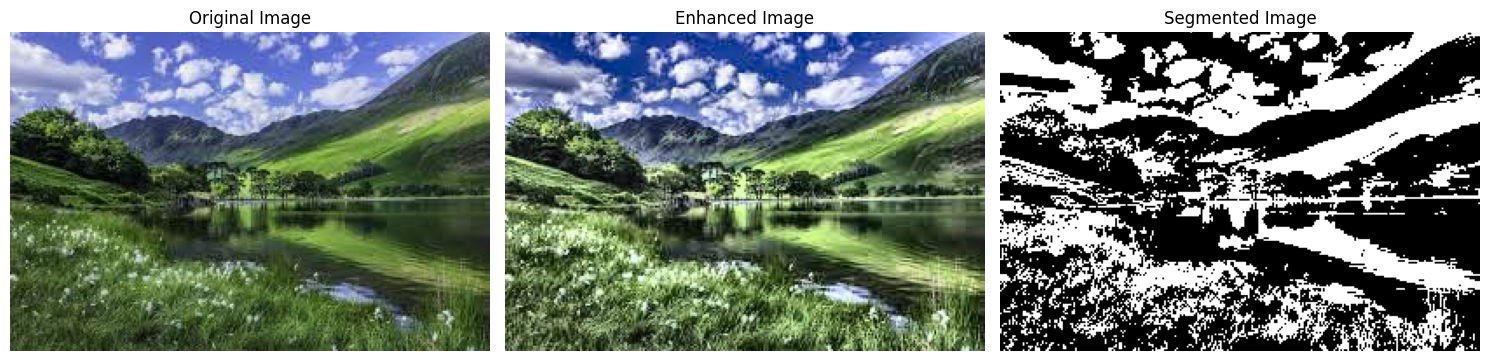

In [1]:
# Import necessary libraries
import cv2               # OpenCV library for computer vision tasks
import matplotlib.pyplot as plt   # Library for displaying images and plots
import numpy as np        # Library for numerical operations (such as arrays)
from skimage.filters import threshold_otsu  # Importing the Otsu thresholding function from skimage

# Function to enhance image contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization)
def enhance_contrast_color(image):
    # Convert the input image to LAB color space (L - Lightness, A - Green-Red, B - Blue-Yellow)
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
   
    # Split the LAB image into individual channels (L, A, B)
    l_channel, a_channel, b_channel = cv2.split(lab_image)
   
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) on the L-channel to enhance contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Set up CLAHE with clip limit and tile grid size
    l_channel = clahe.apply(l_channel)  # Enhance the L-channel
   
    # Merge the enhanced L-channel back with the original A and B channels
    enhanced_lab = cv2.merge([l_channel, a_channel, b_channel])
   
    # Convert the image back from LAB color space to BGR color space
    return cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)

# Function to segment an image using Otsu's thresholding method
def segment_image_color(image):
    # Convert the input image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   
    # Apply Otsu's thresholding method to compute an optimal threshold value for segmentation
    threshold = threshold_otsu(gray_image)
   
    # Return a binary image where pixels greater than the threshold are set to 255 (white), and others to 0 (black)
    return (gray_image > threshold).astype(np.uint8) * 255

# Read the image from the specified path
image = cv2.imread(r'C:\Users\VAISHALI\Downloads\CV\images.jpg')  # Read the image from disk

# Check if the image has been loaded properly, otherwise raise an error
if image is None:
    raise ValueError("Error: Could not load image")

# Enhance the contrast of the original image
enhanced_image = enhance_contrast_color(image)

# Segment the enhanced image using Otsu's thresholding method
segmented_image = segment_image_color(enhanced_image)

# Define the titles and corresponding images for display
titles = ['Original Image', 'Enhanced Image', 'Segmented Image']
images = [
    cv2.cvtColor(image, cv2.COLOR_BGR2RGB),  # Convert the original image to RGB for displaying in matplotlib
    cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB),  # Convert the enhanced image to RGB
    segmented_image  # Segmented image (binary image)
]

# Display the images using matplotlib
plt.figure(figsize=(15, 5))  # Set up the figure size for display
for i, img in enumerate(images):  # Iterate through the images list
    plt.subplot(1, 3, i + 1)  # Create a subplot for each image
    # If it's the segmented image, display it with a grayscale colormap
    plt.imshow(img if i < 2 else img, cmap='gray')  # Display the image
    plt.title(titles[i])  # Add a title for the current image
    plt.axis('off')  # Turn off the axis labels and ticks
plt.tight_layout()  # Adjust layout for better spacing between images
plt.show()  # Display the plot

